In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [7]:
import pandas as pd
import numpy as np
import os
from os.path import join, isdir, dirname, basename, exists

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(context="paper",style="white",font_scale=1.25)
from glob import glob

import matplotlib as mpl

In [2]:
eCON= '/data/bswift-1/Pessoa_Lab/eCON'

yoked = pd.read_excel(join(eCON,'onsetdir/CON_yoked_table.xlsx'))
yoked = yoked.query('use == 1').reset_index()

In [3]:
rois = pd.read_csv(join(eCON,'ApprRetrSeg/Parcellations/MNI/Schaefer2018_300Parcels_17Networks_order.txt'),header=None,sep='\t')
names = rois[1].values 

In [4]:
df = pd.DataFrame()
for i, row in yoked.iterrows():
    con_beta = np.loadtxt(join(eCON,'dataset/results_ShockUncensored/{subj}/controllable/splitted_regs/ROI_Schaefer2018_300ROIs/noProx/{subj}_bucket_REML_clean.1D'.format(subj=row['control'])))
    uncon_beta = np.loadtxt(join(eCON,'dataset/results_ShockUncensored/{subj}/uncontrollable/splitted_regs/ROI_Schaefer2018_300ROIs/noProx/{subj}_bucket_REML_clean.1D'.format(subj=row['uncontrol'])))
    
    shock_paired_diff = uncon_beta[:,1::2][:,-1] - con_beta[:,1::2][:,-1] # only shock betas
    
    tmp_df = pd.DataFrame(shock_paired_diff,index=names).T
    tmp_df['Pair'] = 'P{:02d}'.format(i)
    
    df = pd.concat([df,tmp_df],axis=0)

# Distributions of shock estimates (uncontrol vs. control)

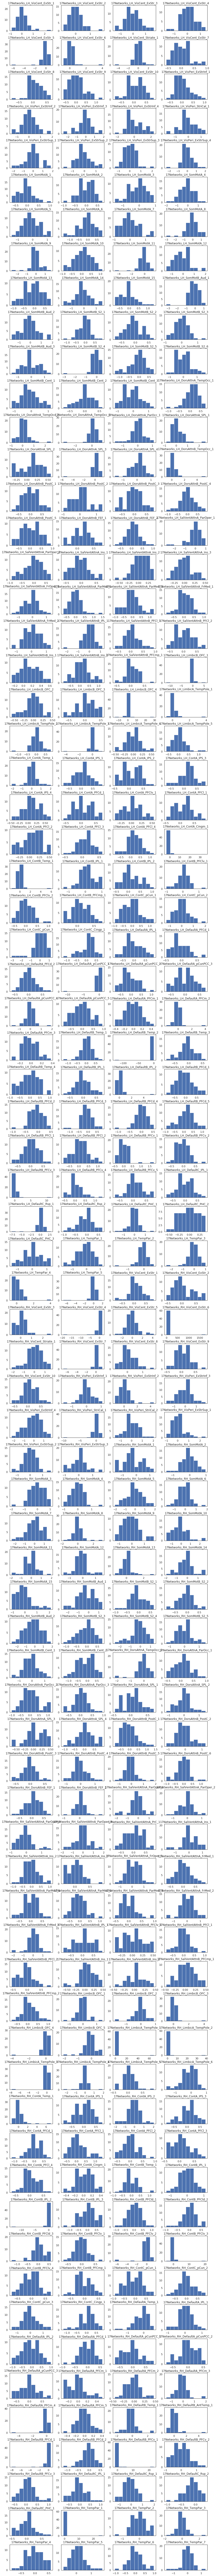

In [19]:
fig, axes = plt.subplots(ncols=4,nrows=75,figsize=(15,200))
axes = axes.flatten()
fig.subplots_adjust(hspace = 0.35)
for ii, ax in enumerate(axes):
    ax.hist(df.loc[:,names[ii]])
    ax.set_title(names[ii],)
    